# Convergence of deal.II code

In this notebook we test the performance of our manufacturing solution implementations.
First, we fix the microscopic problem and solve the macroscopic problem. The approximation should be converging quadratically, using the right elements.

Format:
```
cycle cells dofs    mL2       mH1       ML2       MH1
    0    16   25 3.409e-01 3.409e-01 7.560e-01 1.815e+00
```

In [2]:
import re
import matplotlib.pyplot as plt
if not plt.isinteractive():
    plt.show = lambda:print("Skipping displaying plot")
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [17]:
macro_dofs = []
macro_l2 = []
macro_h1 = []
with open('macro_convergence.txt','r') as mc_file:
    for raw_line in mc_file.readlines():
        if 'cycle' in raw_line:
            continue
        line = raw_line.split()
        macro_dofs.append(int(line[2]))
        macro_l2.append(float(line[3]))
        macro_h1.append(float(line[4]))
macro_dofs = np.array(macro_dofs)
macro_l2 = np.array(macro_l2)
macro_h1 = np.array(macro_h1)

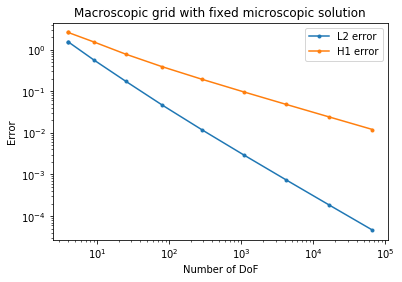

In [28]:
plt.loglog(macro_dofs,macro_l2,'.-')
plt.loglog(macro_dofs,macro_h1,'.-')
plt.xlabel("Number of DoF")
plt.ylabel("Error")
plt.legend(['L2 error','H1 error'])
plt.title("Macroscopic grid with fixed microscopic solution")
plt.savefig("macro_convergence.pdf")
plt.show()

Convergence! What about fixing the macro and testing the micro?

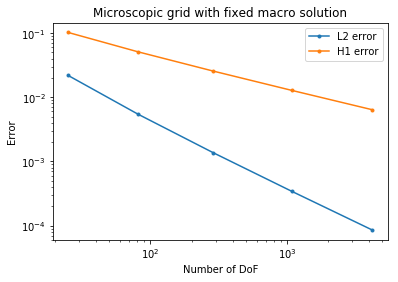

In [7]:
df = pd.read_csv('micro-convergence.txt',delim_whitespace=True)
df = df[df['cycle']=='0']
for column in df.columns:
    df[column] = pd.to_numeric(df[column])
plt.loglog(df.dofs,df.mL2,'.-')
plt.loglog(df.dofs,df.mH1,'.-')
plt.xlabel("Number of DoF")
plt.ylabel("Error")
plt.legend(['L2 error','H1 error'])
plt.title("Microscopic grid with fixed macro solution")
plt.savefig("plot_micro_only_convergence.pdf")
plt.show()

Convergence too! Now all we need is the interaction between the two scales.

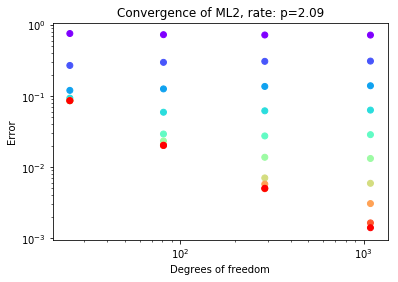

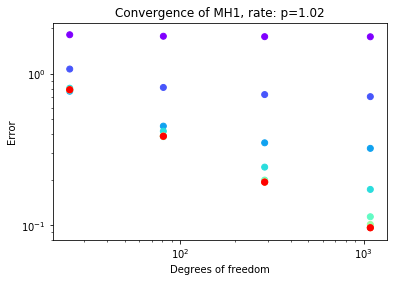

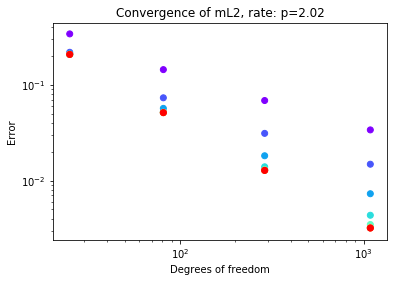

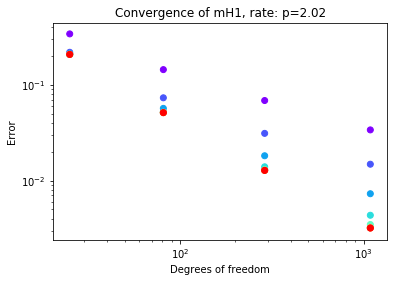

In [67]:
df = pd.read_csv('multi-convergence.txt',delim_whitespace=True)
df = df[df['cycle']!='cycle']
for column in df.columns:
    df[column] = pd.to_numeric(df[column])
max_num_iterations = df['cycle'].max()+1
colors = cm.rainbow(np.linspace(0,1,max_num_iterations))

for scale in ['M','m']:
    for error in ['L2','H1']:
        fig = plt.figure()
        ax = plt.gca()
        ax.set_yscale('log') # Weird. Has to happen before plotting the data.
        ax.set_xscale('log')
        for dof in df.dofs.unique():
            col = "%s%s"%(scale,error)
            sub_df = df[df.dofs==dof]
            ax.scatter(sub_df["dofs"].values,sub_df[col].values,color=colors[-len(sub_df):])
        second_highest_acc = df[df.dofs==df.dofs.unique()[-2]][col].values[-1]
        highest_acc = df[df.dofs==df.dofs.unique()[-1]][col].values[-1]
        conv_rate = np.log(second_highest_acc/highest_acc)/np.log(2)
        plt.title("Convergence of %s, rate: p=%.2f"%(col,conv_rate))
        plt.xlabel("Degrees of freedom")
        plt.ylabel("Error")
        plt.savefig("plot_conv_%s.pdf"%col)
        plt.show()